The data is from a submarine to predict if there is any big rock or mine under it.

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Now create the data frame using pandas
data = pd.read_csv('sonar data.csv', header=None)

In [28]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [29]:
data.shape

(208, 61)

In [30]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [31]:
# seperate data and levels
x=data.drop(columns=60, axis=1)
y=data[60]

In [32]:
print(x)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [34]:
print(x.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [35]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

In [36]:
model=LogisticRegression()

In [37]:
model.fit(X_train,Y_train)

LogisticRegression()

In [38]:
# accuracy of training
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [39]:
print("Accuracy of Training: ",training_data_accuracy)

Accuracy of Training:  0.8342245989304813


In [40]:
# accuray of testing
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [41]:
print("Accuracy of Testing: ",testing_data_accuracy)

Accuracy of Testing:  0.7619047619047619


In [42]:
random_data=(0.06, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111,	0.1609,	0.1582,	0.2238,	0.0645,	0.066,	0.2273,	0.91,	0.2999,	0.5078,	0.4797,	0.5783,	0.5071,	0.4328,	0.555,	0.6711,	0.6415,	0.7104,	0.808,	0.6791,	0.3857,	0.1307,	0.2604,	0.5121,	0.7547,	0.8537,	0.8507,	0.6692,	0.6097,	0.4943,	0.2744,	0.951,	0.2834,	0.2825,	0.4256,	0.2651,	0.1386,	0.1051,	0.1343,	0.0383,	0.0324,	0.0232,	0.0027,	0.0065,	0.0159,	0.0072,	0.0167,	0.018,	0.0064,	0.009,	0.3032)

In [43]:
random_data1=(0.0265, 0.044, 0.0137, 0.0084, 0.0305, 0.0438, 0.0341, 0.078, 0.0844, 0.0779,
    0.0327, 0.206, 0.1908, 0.1065, 0.1457, 0.2232, 0.207, 0.1105, 0.1078, 0.1165,
    0.2224, 0.0689, 0.206, 0.2384, 0.0904, 0.2278, 0.5872, 0.8457, 0.8467, 0.7679,
    0.8055, 0.626, 0.6545, 0.8747, 0.9885, 0.9348, 0.696, 0.5733, 0.5872, 0.6663,
    0.5651, 0.5247, 0.3684, 0.1997, 0.1512, 0.0508, 0.0931, 0.0982, 0.0524, 0.0188,
    0.01, 0.0038, 0.0187, 0.0156, 0.0068, 0.0097, 0.0073, 0.0081, 0.0086, 0.0095)

In [44]:
input_data=np.asarray(random_data1)
input_data_reshaped=input_data.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("Rock Founded!" if prediction[0]=='R' else "Be alert!\nThere is a Mine under you!")

Rock Founded!


Be alert!
There is a Mine under you!


In [63]:
models = [LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier]
accuracy_scores = []
for model in models:
  classifier = model().fit(X_train, Y_train)
  prediction = classifier.predict(X_test)
  accuracy_scores.append(accuracy_score(y_true=Y_test, y_pred=prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [64]:
models={
    'Logestic Regression':LogisticRegression(),
    'Support Vector Classifier':SVC(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Random Forest Classifier':RandomForestClassifier(),
    'AdaBoost Classifier':AdaBoostClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
}

Cross_val_result={}
for model_name,model in models.items():
    cv_score=cross_val_score(model,x,y,cv=5)
    Cross_val_result[model_name]=np.mean(cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [67]:
mean_val=[scores.mean() for scores in Cross_val_result.values()]
std_scores=[scores.std() for scores in Cross_val_result.values()]
model_names=list(Cross_val_result.keys())

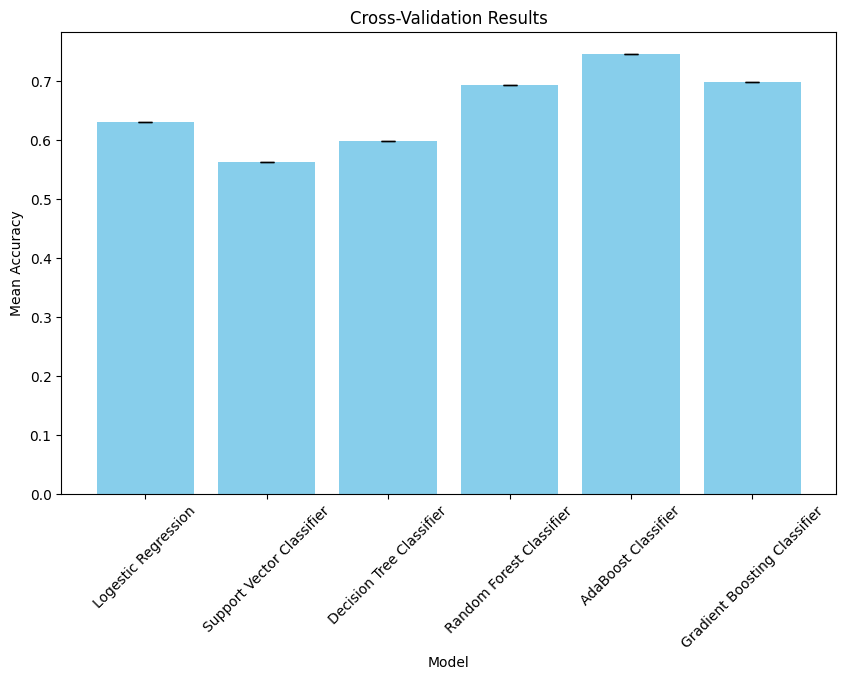

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_val, yerr=std_scores, capsize=5, color='skyblue')
plt.title('Cross-Validation Results')
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [65]:
Tota_Classification = pd.DataFrame({
    "Model": ['Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier',
              'Random Forest Classifier','AdaBoost Classifier','Gradient Boosting Classifier','Bagging Classifier'],
    "Accuracy": accuracy_scores,
})
classification_model_df = Tota_Classification.sort_values(by='Accuracy', ascending=False)
classification_model_df.set_index('Model', inplace=True)
classification_model_df

,Accuracy
Model,
Support Vector Classifier,0.809524
Logistic Regression,0.761905
Random Forest Classifier,0.761905
AdaBoost Classifier,0.761905
Gradient Boosting Classifier,0.761905
Bagging Classifier,0.714286
Decision Tree Classifier,0.666667


from matplotlib import pyplot as plt
classification_model_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_model_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

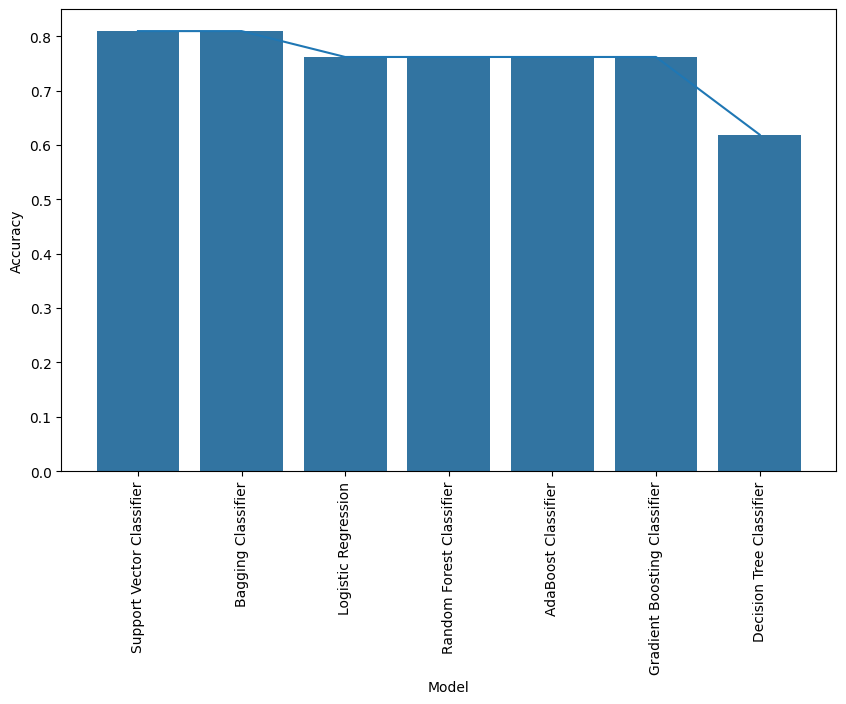

Text(50.7222222222222, 0.5, 'Accuracy')

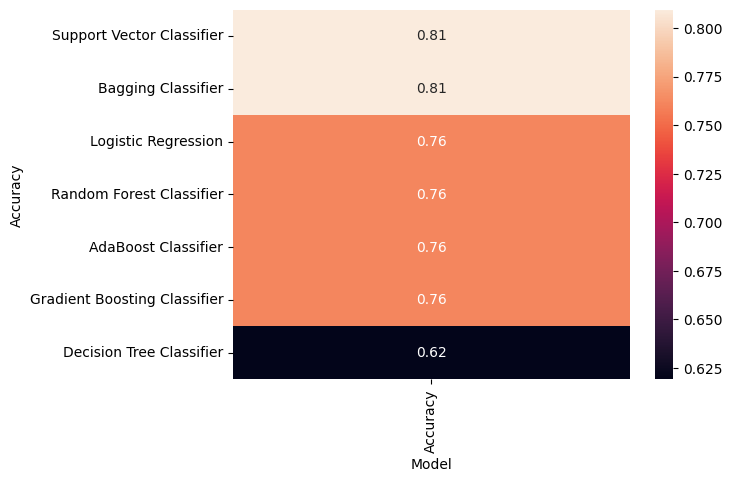

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_model_df.index, y=classification_model_df['Accuracy'])
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
sns.lineplot(x=classification_model_df.index, y=classification_model_df['Accuracy'])
plt.show()
sns.heatmap(classification_model_df, annot=True)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')


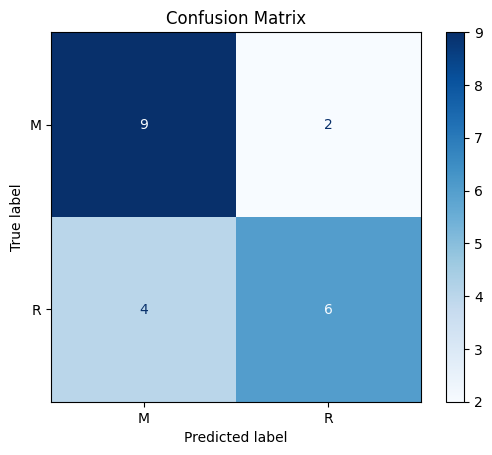

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test,prediction,cmap='Blues')
plt.title('Confusion Matrix')
plt.show()